In [1]:
# Import the necessary libraries

import re 

import numpy as np

import tweepy 

from tweepy import OAuthHandler 

from textblob import TextBlob 

import matplotlib.pyplot as plt

import pandas as pd

from wordcloud import WordCloud

from better_profanity import profanity

In [2]:
# Remember to keep your Keys and Tokens a secret!

consumer_key = 'xxxxx'
consumer_secret = 'xxxxx' 
access_token = 'xxxxx'
access_token_secret = 'xxxxx'

In [3]:
# Access Twitter Data

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)


api = tweepy.API(auth)

In [4]:
# Input a query from the user

query = input("Please enter your topic / person of interest: ")

# In this case, we will input the query as 'Elon Musk'

# Filter the query to remove retweets

filtered = query + "-filter:retweets"

# Generate the latest tweets on the given query 

tweets = tweepy.Cursor(api.search_tweets, 
                           q=filtered,
                           lang="en").items(100)

# Create a list of the tweets, the users, and their location

list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]
list1

Please enter your topic / person of interest: elon musk


[['@Artugal3 @dj_breathnach fun fact ,elon musk will have colonised mars before the  west gets broadband ,google it ,its a fact .',
  'jamesmadiba2',
  'ireland'],
 ["@matthaldane ELON MUSK WILL STOP AT NOTHING TO BUY THAT GUY'S SHITTER",
  'chetkelly69',
  ''],
 ['“Twitter is in no way a ‘town square’. Only town squares are town squares. They are public for a reason. And they a… https://t.co/WiTSN4D7Ec',
  'rick_carp',
  'New Jersey'],
 ["Elon Musk wants to 'authenticate all real humans' on Twitter. In addition to Musk likely getting more data about yo… https://t.co/y9UvUdY5g5",
  'typo_cat',
  'New England now NorCal'],
 ['@SpaceX @elonmusk @Space_Station 🎶🎶🎶“Wanna take a trip in my little rocket ship” 🎶🎶🎶  Elon Musk is totally one of little Einstein grown up!',
  'smylzncries',
  'Las Vegas, NV'],
 ['I just love the fact that this Elon musk speaks freely regardless of who he Is \nRespect your balance can feed the whole earth in one day',
  'Emmanulbassi',
  ''],
 ['The way Elon Musk

In [5]:
# Convert the list into a dataframe

df = pd.DataFrame(data=list1, 
                    columns=['tweets','user', "location"])
df

,tweets,user,location
0,"@Artugal3 @dj_breathnach fun fact ,elon musk w...",jamesmadiba2,ireland
1,@matthaldane ELON MUSK WILL STOP AT NOTHING TO...,chetkelly69,
2,“Twitter is in no way a ‘town square’. Only to...,rick_carp,New Jersey
3,Elon Musk wants to 'authenticate all real huma...,typo_cat,New England now NorCal
4,@SpaceX @elonmusk @Space_Station 🎶🎶🎶“Wanna tak...,smylzncries,"Las Vegas, NV"
...,...,...,...
95,Elon Musk paid 44 billion dolars to save this ...,Seckomatik,
96,The FTC is looking at whether Elon Musk's init...,ScottDWallace1,
97,Throwing this out into the chaos…\nWorried abo...,SS102016,
98,he declared that Twitter should be 'politicall...,GRANADAPOSTERS,"Dallas, TX"


In [6]:
# Convert only the tweets into a list

tweet_list = df.tweets.to_list()
tweet_list

['@Artugal3 @dj_breathnach fun fact ,elon musk will have colonised mars before the  west gets broadband ,google it ,its a fact .',
 "@matthaldane ELON MUSK WILL STOP AT NOTHING TO BUY THAT GUY'S SHITTER",
 '“Twitter is in no way a ‘town square’. Only town squares are town squares. They are public for a reason. And they a… https://t.co/WiTSN4D7Ec',
 "Elon Musk wants to 'authenticate all real humans' on Twitter. In addition to Musk likely getting more data about yo… https://t.co/y9UvUdY5g5",
 '@SpaceX @elonmusk @Space_Station 🎶🎶🎶“Wanna take a trip in my little rocket ship” 🎶🎶🎶  Elon Musk is totally one of little Einstein grown up!',
 'I just love the fact that this Elon musk speaks freely regardless of who he Is \nRespect your balance can feed the whole earth in one day',
 'The way Elon Musk is buying things, we can wake up tomorrow den he’s decided to buy Nigeria oo 😂😂',
 '@PPathole @elonmusk Everyone has Twitter and Elon Musk has Twitter, but there is a nuance 😂',
 "Psaki responds to E

In [7]:
# Create a function to clean the tweets. Remove profanity, unnecessary characters, spaces, and stopwords.

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [8]:
# Run the list of tweets through the function.

cleaned = [clean_tweet(tw) for tw in tweet_list]
cleaned

<ipython-input-7-92e0f7140c9e>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['fun fact elon musk will have colonised mars before west gets broadband google it its fact',
 'elon musk will stop at nothing buy that guys',
 'twitter is no way town square only town squares are town squares they are public reason they',
 'elon musk wants authenticate all real humans twitter addition musk likely getting more data about yo',
 'wanna take trip my little rocket ship elon musk is totally one little einstein grown up',
 'i just love fact that this elon musk speaks freely regardless who he is respect your balance can feed whole earth one day',
 'way elon musk is buying things we can wake up tomorrow den he s decided buy nigeria oo',
 'everyone has twitter elon musk has twitter but there is nuance',
 'psaki responds elon musk buying twitter by floating reforms combat misinformation',
 'they should all quit their jobs protest elon musk taking control twitter',
 'elon musk compro whatsapp',
 'so twitter was sold elon musk xd',
 'yes pull out california you did it with tesla',

In [9]:
# Define the sentiment objects using TextBlob

sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.3,
 TextBlob("fun fact elon musk will have colonised mars before west gets broadband google it its fact"))

In [10]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]

[0.3,
 'fun fact elon musk will have colonised mars before west gets broadband google it its fact']

In [11]:
# Print all the sentiment values

sentiment_values[0:99]

[[0.3,
  'fun fact elon musk will have colonised mars before west gets broadband google it its fact'],
 [0.0, 'elon musk will stop at nothing buy that guys'],
 [0.0,
  'twitter is no way town square only town squares are town squares they are public reason they'],
 [0.225,
  'elon musk wants authenticate all real humans twitter addition musk likely getting more data about yo'],
 [-0.125,
  'wanna take trip my little rocket ship elon musk is totally one little einstein grown up'],
 [0.3666666666666667,
  'i just love fact that this elon musk speaks freely regardless who he is respect your balance can feed whole earth one day'],
 [0.0,
  'way elon musk is buying things we can wake up tomorrow den he s decided buy nigeria oo'],
 [0.0, 'everyone has twitter elon musk has twitter but there is nuance'],
 [0.0,
  'psaki responds elon musk buying twitter by floating reforms combat misinformation'],
 [0.0,
  'they should all quit their jobs protest elon musk taking control twitter'],
 [0.0, 'el

In [12]:
# Create a dataframe of each tweet against its polarity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

,polarity,tweet
0,0.300,fun fact elon musk will have colonised mars be...
1,0.000,elon musk will stop at nothing buy that guys
2,0.000,twitter is no way town square only town square...
3,0.225,elon musk wants authenticate all real humans t...
4,-0.125,wanna take trip my little rocket ship elon mus...
...,...,...
95,0.000,elon musk paid 44 billion dolars save this
96,0.000,ftc is looking at whether elon musks initial 9...
97,0.000,throwing this out into chaos worried about elo...
98,0.000,he declared that twitter should be politically...


In [13]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

m

0     0.300
1     0.000
2     0.000
3     0.225
4    -0.125
      ...  
95    0.000
96    0.000
97    0.000
98    0.000
99   -0.100
Name: polarity, Length: 100, dtype: float64

In [14]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

Positive
Neutral
Neutral
Positive
Negative
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Neutral
Positive
Negative
Negative
Negative
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Neutral
Neutral
Positive
Positive
Neutral
Negative
Neutral
Negative
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Negative
Positive
Positive
Neutral
Negative
Neutral
Negative
Positive
Positive
Neutral
Neutral
Negative
Positive
Negative
Neutral
Neutral
Positive
Positive
Negative
Negative
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Positive
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Neutral
Neutral
Positive
Negative
Positive
Negative
Neutral
Neutral
Neutral
Neutral
Negative
29 20 51


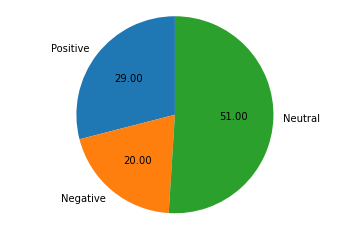

In [15]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

In [16]:
# Display the number of twitter users who feel a certain way about the given topic.

print("%f percent of twitter users feel positive about %s"%(pos,query))

print("%f percent of twitter users feel negative about %s"%(neg,query))

print("%f percent of twitter users feel neutral about %s"%(neu,query))

29.000000 percent of twitter users feel positive about elon musk
20.000000 percent of twitter users feel negative about elon musk
51.000000 percent of twitter users feel neutral about elon musk


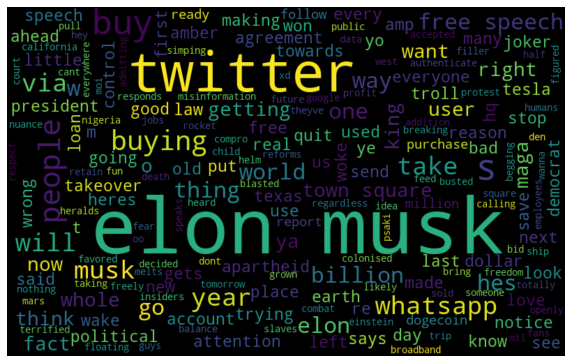

In [17]:
# Create a Wordcloud from the tweets

all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()